## IMPORTING MAJOR LIBRARIES

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [80]:
diabetes = pd.read_csv(r"C:\module 7\diabetes.csv")

In [82]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## FEATURES AND TARGET

In [85]:
x = diabetes.iloc[:, 0:8]
y = diabetes['Outcome']

In [87]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 4)

In [91]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [93]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [95]:
clf = LogisticRegression()

In [97]:
clf.fit(x_train, y_train)

LogisticRegression()

## CALCULATE AND VISUALIZE A CONFUSION MATRIX

In [100]:
from sklearn.metrics import confusion_matrix

In [102]:
y_pred = clf.predict(x_test)

In [104]:
cm = confusion_matrix(y_test, y_pred)

In [106]:
import seaborn as sns

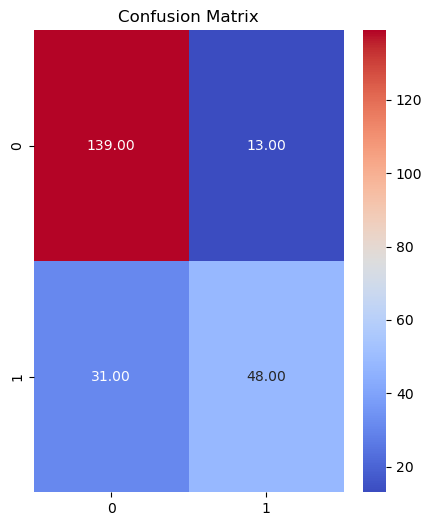

In [108]:
plt.figure(figsize = (5,6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

In [112]:
from sklearn.metrics import ConfusionMatrixDisplay

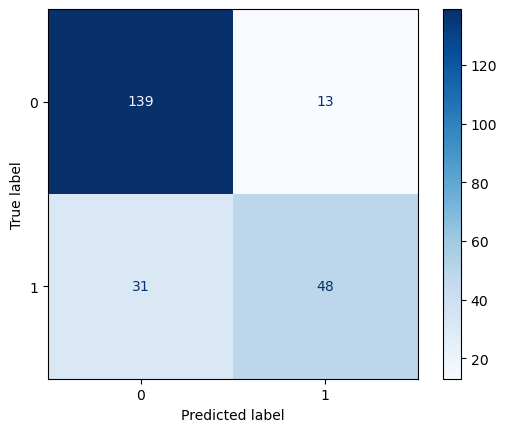

In [118]:
disp = ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, cmap=plt.cm.Blues)
disp.figure_.savefig("cm.png")

## ACCURACY AND ERROR

In [125]:
from sklearn.metrics import accuracy_score as acc

In [127]:
acc(y_test, y_pred)

0.8095238095238095

In [131]:
error = 1 - acc(y_test, y_pred)
error

0.19047619047619047

## SENSITIVITY AND SPECIFICITY

In [134]:
cm = confusion_matrix(y_test, y_pred)
cm[0, 1]

13

In [153]:
tn = cm[0,0]
tp = cm[1,1]
fn = cm[1,0]
fp = cm[0,1]

In [155]:
sensitivity = tp/(tp + fn)
sensitivity

0.6075949367088608

In [157]:
specificity = tn/(tn + fp)
specificity

0.9144736842105263

## PRECISION, RECALL, F1_SCORE, SUPPORT

In [160]:
from sklearn.metrics import classification_report

In [164]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       152
           1       0.79      0.61      0.69        79

    accuracy                           0.81       231
   macro avg       0.80      0.76      0.77       231
weighted avg       0.81      0.81      0.80       231



## ROC AND AUC

In [169]:
from sklearn.metrics import roc_curve, roc_auc_score

In [171]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

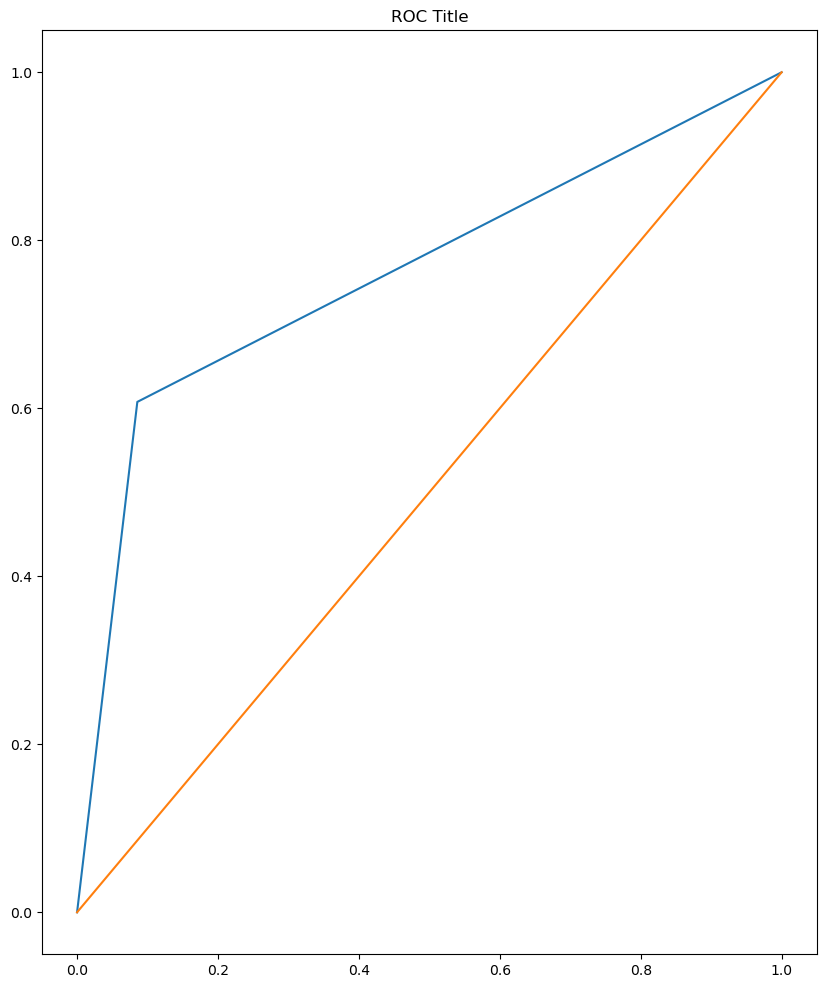

In [179]:
plt.figure(figsize = (10,12))
plt.title('ROC Title')
plt.plot(fpr, tpr)
plt.plot([0,1],[0, 1])
plt.show()

In [181]:
roc_auc_score(y_test, y_pred)

0.7610343104596936